In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Continue with your analysis
import matplotlib.pyplot as plt
import pandas as pd


# Reload the dataset if necessary
file_path = '/content/drive/My Drive/data_science/data_640_validated.csv'
data_csv = pd.read_csv(file_path, encoding='latin1')

Mounted at /content/drive


A. Q1

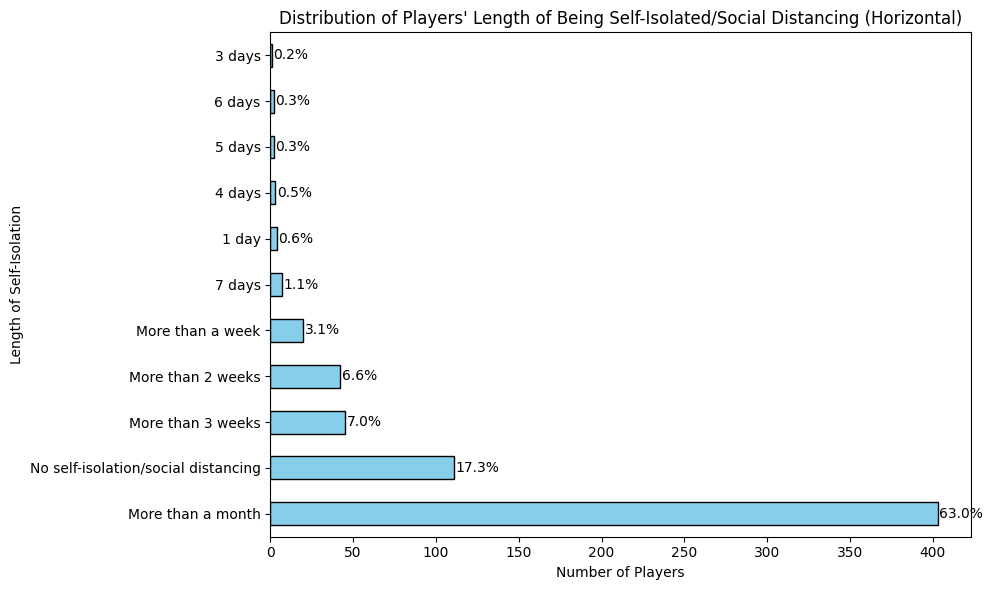

In [ ]:
# Define the variable again if needed
self_isolation_distribution = data_csv['B2'].value_counts()

# Calculate percentages
percentages = (self_isolation_distribution / self_isolation_distribution.sum()) * 100

# Horizontal Bar Chart
plt.figure(figsize=(10, 6))
ax = self_isolation_distribution.plot(kind='barh', color='skyblue', edgecolor='black')

# Add percentages as text annotations
for i, (count, percentage) in enumerate(zip(self_isolation_distribution, percentages)):
    plt.text(count + 1, i, f"{percentage:.1f}%", va='center')  # Adjust `+1` for spacing

# Add titles and labels
plt.title("Distribution of Players' Length of Being Self-Isolated/Social Distancing (Horizontal)")
plt.xlabel("Number of Players")
plt.ylabel("Length of Self-Isolation")
plt.tight_layout()
plt.show()


A. Q2

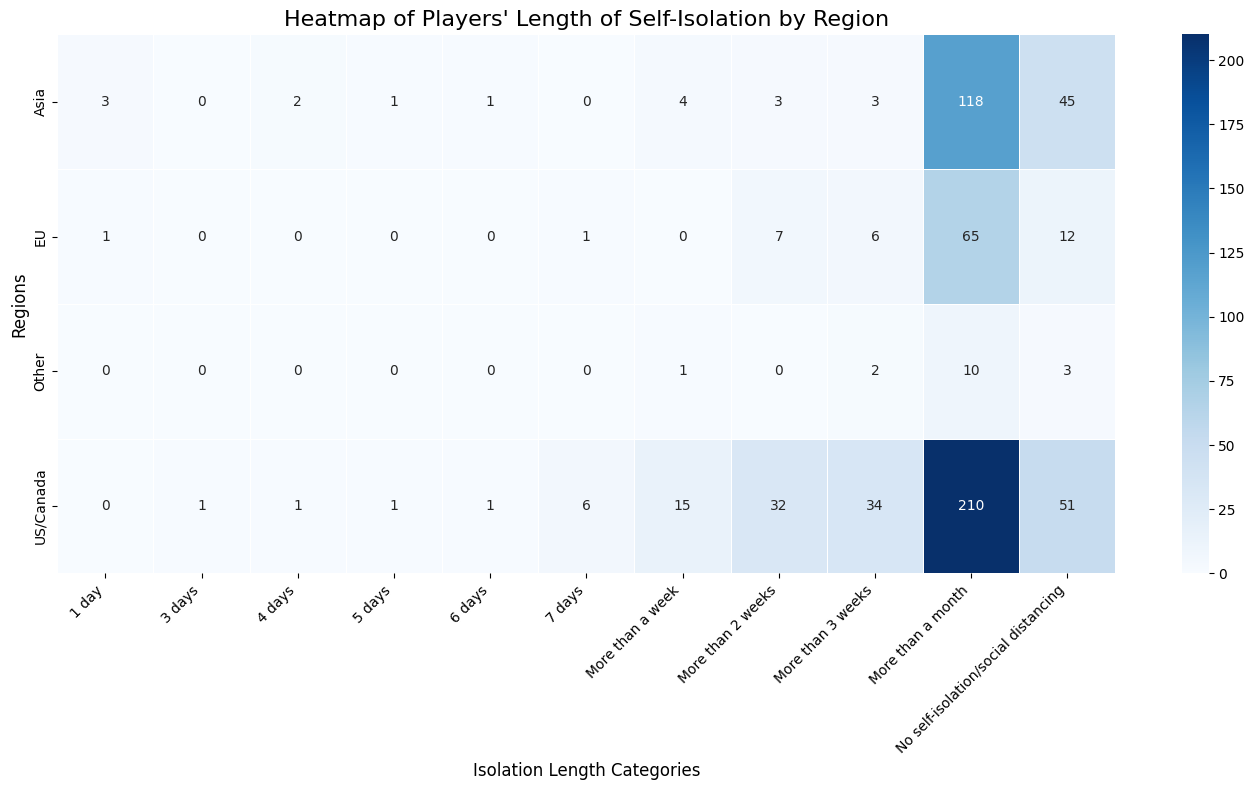

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data_640_validated.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Group data by region and the raw "B2" column
region_distribution_raw = data.groupby(['A1_2', 'B2']).size().unstack(fill_value=0)

# Define the custom order for the x-axis
custom_order = [
    "1 day", "3 days", "4 days", "5 days", "6 days", "7 days",
    "More than a week", "More than 2 weeks", "More than 3 weeks",
    "More than a month", "No self-isolation/social distancing"
]

# Reorder the columns based on the custom order
region_distribution_raw = region_distribution_raw.reindex(columns=custom_order)

# Create a heatmap with the reordered data
plt.figure(figsize=(14, 8))
sns.heatmap(region_distribution_raw, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title('Heatmap of Players\' Length of Self-Isolation by Region', fontsize=16)
plt.xlabel('Isolation Length Categories', fontsize=12)
plt.ylabel('Regions', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('region_heatmap_distribution_reordered.png', dpi=300)
plt.show()


A. Q3

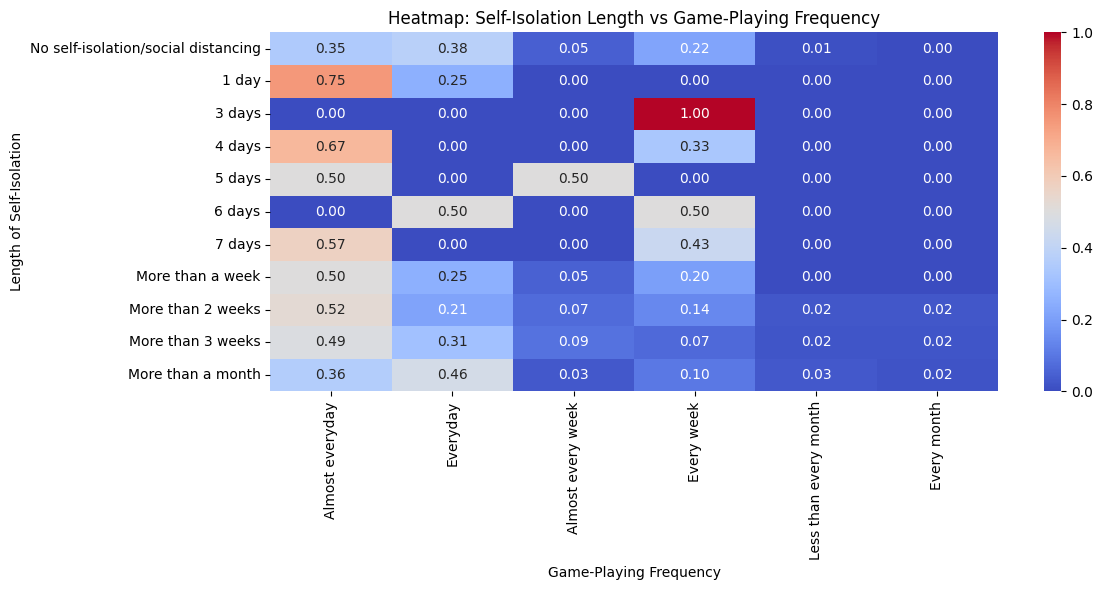

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the data files
csv_file_path = '/content/drive/My Drive/data_science/data_640_validated.csv'
data_csv = pd.read_csv(csv_file_path, encoding='latin1')

# Extract relevant columns
self_isolation_length = data_csv['B2']
game_frequency = data_csv['D3']  # Assuming D3 corresponds to game-playing frequency

# Define the custom order for the y-axis
y_axis_order = [
    "No self-isolation/social distancing",
    "1 day",
    "3 days",
    "4 days",
    "5 days",
    "6 days",
    "7 days",
    "More than a week",
    "More than 2 weeks",
    "More than 3 weeks",
    "More than a month"
]

# Define the custom order for the x-axis
x_axis_order = [
    "Almost everyday",
    "Everyday",
    "Almost every week",
    "Every week",
    "Less than every month",
    "Every month"
]

# Crosstab for heatmap
heatmap_data = pd.crosstab(data_csv['B2'], data_csv['D3'], normalize='index')

# Reindex the rows and columns to match the custom orders
heatmap_data = heatmap_data.reindex(index=y_axis_order, columns=x_axis_order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap: Self-Isolation Length vs Game-Playing Frequency")
plt.ylabel("Length of Self-Isolation")
plt.xlabel("Game-Playing Frequency")
plt.tight_layout()
plt.show()


A. Q4

<Figure size 1200x600 with 0 Axes>

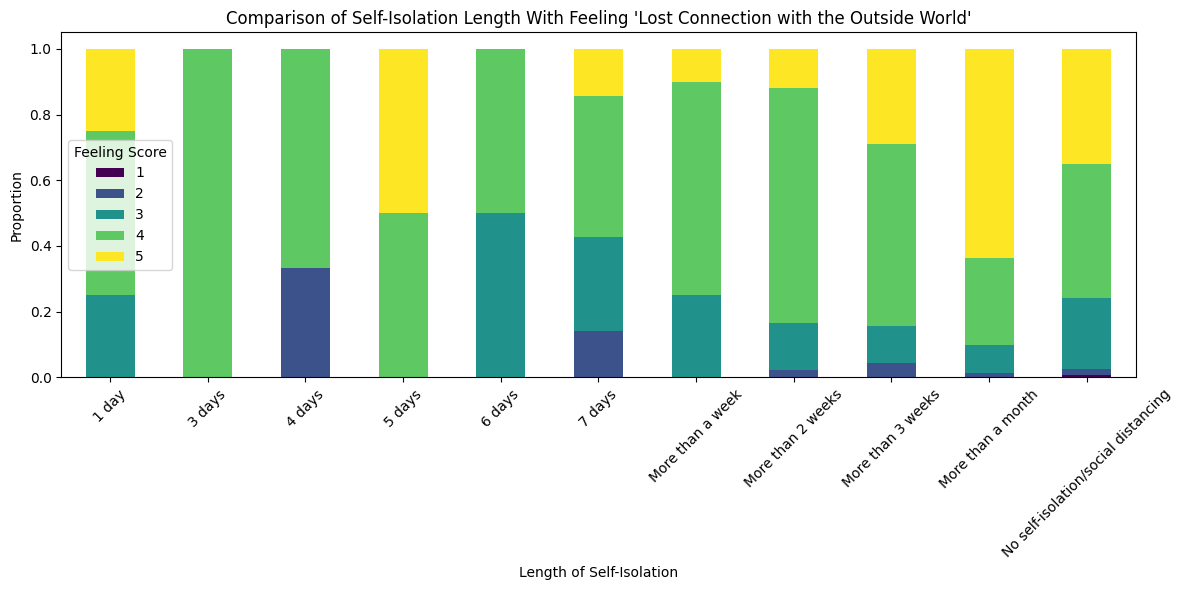

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Reload the dataset if necessary
file_path = 'data_640_validated.csv'
data_csv = pd.read_csv(file_path, encoding='latin1')

# Define the correct order for the B2 column
category_order = [
    "1 day", "3 days", "4 days", "5 days", "6 days", "7 days",
    "More than a week", "More than 2 weeks", "More than 3 weeks",
    "More than a month", "No self-isolation/social distancing"
]

# Convert B2 column to a categorical type with the specified order
data_csv['B2'] = pd.Categorical(data_csv['B2'], categories=category_order, ordered=True)

# Grouping and preparing data for analysis
# Assuming F1 corresponds to "lost connection with the outside world" for simplicity
isolation_vs_feeling = (
    data_csv.groupby('B2')['F1']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

# Plotting the comparison chart
plt.figure(figsize=(12, 6))
isolation_vs_feeling.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add chart details
plt.title("Comparison of Self-Isolation Length With Feeling 'Lost Connection with the Outside World'")
plt.ylabel("Proportion")
plt.xlabel("Length of Self-Isolation")
plt.legend(title="Feeling Score")
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
